In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.neural_net import NeuralNetVol, ResNeuralNetVol, ResNeuralNetVolSd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils.rough_vol import RoughVol

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head()

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048


In [5]:
spx_rkth2 = np.sqrt(data.query('Symbol==".SPX"').rk_th2.values)

In [6]:
nnet_model = ResNeuralNetVol(hiddenlayer=[5,10,10])
roughvol_model = RoughVol(fit_period=200)

In [7]:
spx_rkth2.__len__()

4963

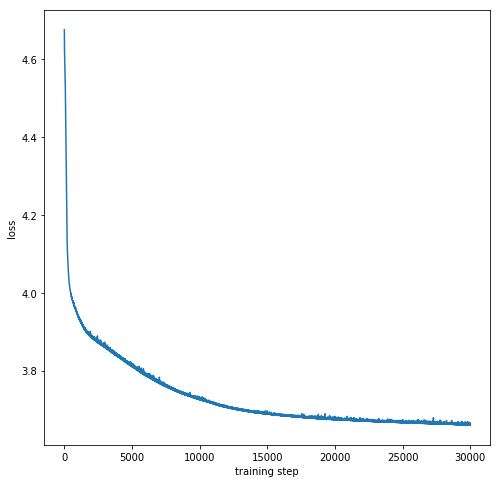

38.96678161621094

In [8]:
nnet_model.fit(spx_rkth2[:3000], draw_loss=True,steps=30000, lrs=[1e-3])

In [9]:
roughvol_model.fit(spx_rkth2[:3000])

0.14648771963095852

In [10]:
nnet_model.predict(spx_rkth2[3000:4000])

array([[0.00548187, 0.00547429, 0.00546393, ..., 0.00667314, 0.00666572,
        0.0066462 ],
       [0.00494772, 0.00490124, 0.00485621, ..., 0.00562054, 0.00561323,
        0.00559075],
       [0.00493655, 0.00492167, 0.00490718, ..., 0.00575166, 0.0057531 ,
        0.00573916],
       ...,
       [0.0057732 , 0.00568198, 0.00559397, ..., 0.00614708, 0.00613823,
        0.00610944],
       [0.00650119, 0.0062573 , 0.00602823, ..., 0.00587163, 0.00584838,
        0.00579956],
       [0.00670008, 0.00635737, 0.00603192, ..., 0.00536328, 0.00533169,
        0.00527594]])

In [ ]:
result=[]
for i in tqdm(range(100)):
    forward = i+1
    roughvol_model.forward = forward
    result.append(roughvol_model.predict(spx_rkth2[3000:4000]))
roughvol_result = np.array(result).T

In [ ]:
nnet_result=nnet_model.predict(spx_rkth2[3000:4000])

In [ ]:
spx_rkth2[3200:4000]

In [ ]:
roughvol_result.shape,  nnet_result.shape

In [ ]:
true_result = np.array([spx_rkth2[ele:ele+101] for ele in range(3199,4000)])

In [ ]:
true_result.shape

In [ ]:
unconditional_var = np.mean((np.log(true_result[:,1:])-np.log(true_result[:,0][:,np.newaxis]))**2,axis=0)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(1,101),unconditional_var)
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0))
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0))
plt.legend(['unconditional_var', 'roughvol','nnet'])

In [ ]:
np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0)

In [ ]:
np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0)